In [2556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2557]:
df=pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [2558]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [2559]:
df=df.drop(['Latitude', 'Longitude'], axis=1)

In [2560]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire
...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China
239173,2013-06-01,23.522,0.647,Xian,China
239174,2013-07-01,25.251,1.042,Xian,China
239175,2013-08-01,24.528,0.840,Xian,China


In [2561]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
dtype: int64

In [2562]:
df=df.dropna(axis=0)

In [2563]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
dtype: int64

In [2564]:
col_name=['date','avgT','avgTuncertain','city','country']
i=0
for c in df.columns:
    df=df.rename(columns={c:col_name[i]})
    i=i+1

In [2565]:
df

,date,avgT,avgTuncertain,city,country
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire
...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China
239172,2013-05-01,18.979,0.807,Xian,China
239173,2013-06-01,23.522,0.647,Xian,China
239174,2013-07-01,25.251,1.042,Xian,China


In [2566]:
df["date"]=pd.to_datetime(df["date"])
df.set_index('date',inplace=True)

In [2567]:
df

,avgT,avgTuncertain,city,country
date,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire
...,...,...,...,...
2013-04-01,12.563,1.823,Xian,China
2013-05-01,18.979,0.807,Xian,China
2013-06-01,23.522,0.647,Xian,China


In [2568]:
df.describe()

,avgT,avgTuncertain
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [2569]:
df['year']=df.index.year
df

,avgT,avgTuncertain,city,country,year
date,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,1849
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,1849
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,1849
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,1849
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,1849
...,...,...,...,...,...
2013-04-01,12.563,1.823,Xian,China,2013
2013-05-01,18.979,0.807,Xian,China,2013
2013-06-01,23.522,0.647,Xian,China,2013


In [2570]:
df.describe()

,avgT,avgTuncertain,year
count,228175.000000,228175.000000,228175.000000
mean,18.125969,0.969343,1913.893209
std,10.024800,0.979644,62.025981
min,-26.772000,0.040000,1743.000000
25%,12.710000,0.340000,1869.000000
50%,20.428000,0.592000,1918.000000
75%,25.918000,1.320000,1966.000000
max,38.283000,14.037000,2013.000000


In [2571]:
df = df.sort_index()

In [2572]:
latest_df=df.loc["1980":"2013"]
latest_df

,avgT,avgTuncertain,city,country,year
date,,,,,
1980-01-01,4.403,0.099,Wuhan,China,1980
1980-01-01,21.190,0.320,Pune,India,1980
1980-01-01,-12.561,0.279,Moscow,Russia,1980
1980-01-01,19.977,0.324,Lima,Peru,1980
1980-01-01,23.772,0.105,Hyderabad,India,1980
...,...,...,...,...,...
2013-09-01,17.408,1.048,New York,United States,2013
2013-09-01,23.301,0.984,Los Angeles,United States,2013
2013-09-01,14.599,1.274,Toronto,Canada,2013


In [2573]:
latest_df[['country','avgT']].groupby(['country']).mean().sort_values('avgT')

,avgT
country,
Russia,5.046834
Canada,6.188707
Chile,6.297983
Ukraine,8.042911
Germany,9.793525
United Kingdom,10.190399
France,11.204275
South Korea,11.468057
Spain,12.247770


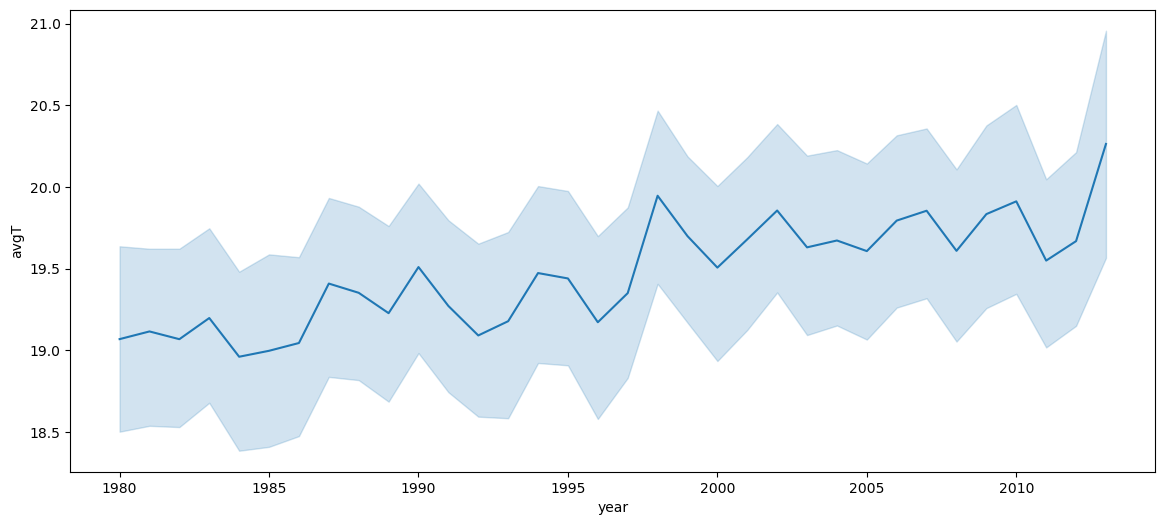

In [2574]:
plt.figure(figsize=(14,6))
sns.lineplot(x='year',y='avgT',data=latest_df)
plt.show()

In [2575]:
resample_df=latest_df[['avgT']].resample('A').mean()
resample_df


,avgT
date,
1980-12-31,19.068541
1981-12-31,19.115568
1982-12-31,19.068149
1983-12-31,19.197572
1984-12-31,18.960732
1985-12-31,18.997136
1986-12-31,19.044756
1987-12-31,19.408556
1988-12-31,19.352042


In [2576]:
plt.show()
resample_df.plot(title="Temperature Change from 1980-2013",figsize=(8,5))
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Year',fontsize=12)
plt.legend()


In [2577]:
from statsmodels.tsa.stattools import adfuller

print("Dickey Fuller Test Results:")
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=["Test Statistic",'p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value(%s)'%key]=value
print(df_output)    

Dickey Fuller Test Results:
Test Statistic                 -0.681770
p-value                         0.851415
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value(1%)             -3.661429
Critical Value(5%)             -2.960525
Critical Value(10%)            -2.619319
dtype: float64


In [2578]:
decomp=seasonal_decompose(resample_df,period=3)
trend=decomp.trend
seasonality=decomp.seasonal
residual=decomp.resid

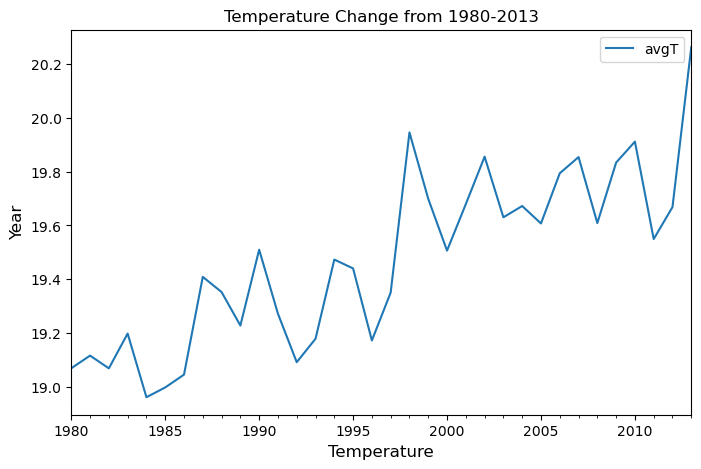

<Figure size 600x500 with 0 Axes>

In [2579]:
plt.show()
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonality)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))



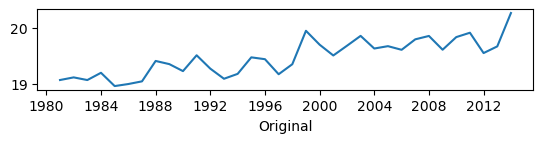

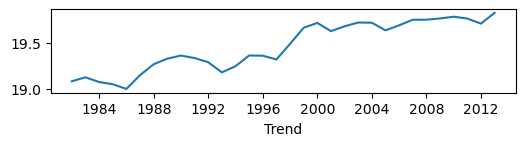

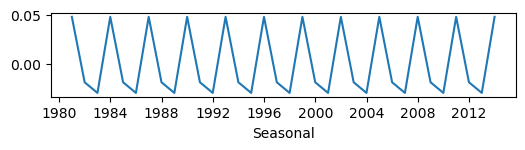

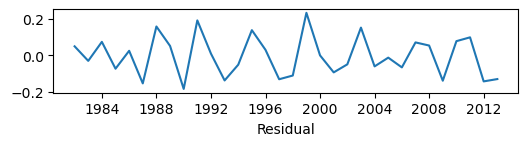

<Figure size 600x500 with 0 Axes>

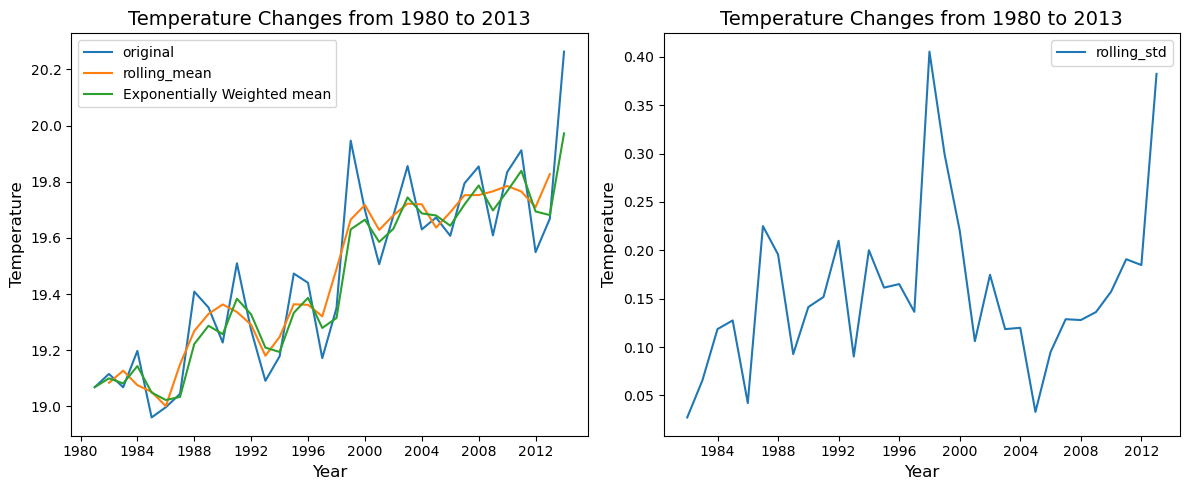

In [2580]:
rol_mean=resample_df.rolling(window=3,center=True).mean()

ewm=resample_df.ewm(span=3).mean()
rol_std=resample_df.rolling(window=3,center=True).std()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(resample_df,label='original')
ax1.plot(rol_mean,label='rolling_mean')
ax1.plot(ewm,label='Exponentially Weighted mean')
ax1.set_title("Temperature Changes from 1980 to 2013",fontsize=14)
ax1.set_ylabel("Temperature",fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='rolling_std')
ax2.set_title("Temperature Changes from 1980 to 2013",fontsize=14)
ax2.set_ylabel("Temperature",fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


In [2581]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)


print("Dickey Fuller Test Results:")
test_df=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=["Test Statistic",'p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value(%s)'%key]=value
print(df_output)  
print("")
print("Dickey Fuller Test Results:")
test_df=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=["Test Statistic",'p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value(%s)'%key]=value
print(df_output)  

Dickey Fuller Test Results:
Test Statistic                 -0.656891
p-value                         0.857602
Lags Used                       5.000000
Number of Observations Used    26.000000
Critical Value(1%)             -3.711212
Critical Value(5%)             -2.981247
Critical Value(10%)            -2.630095
dtype: float64

Dickey Fuller Test Results:
Test Statistic                 -0.321583
p-value                         0.922391
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value(1%)             -3.661429
Critical Value(5%)             -2.960525
Critical Value(10%)            -2.619319
dtype: float64


In [2582]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean

,avgT
date,
1981-12-31,0.031482
1982-12-31,-0.058948
1983-12-31,0.122088
1984-12-31,-0.091082
1985-12-31,-0.003739
1986-12-31,-0.105393
1987-12-31,0.140104
1988-12-31,0.022716
1989-12-31,-0.135610


In [2583]:
diff_ewm=resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm

,avgT
date,
1980-12-31,0.000000
1981-12-31,0.015676
1982-12-31,-0.013604
1983-12-31,0.054049
1984-12-31,-0.088448
1985-12-31,-0.025609
1986-12-31,0.010919
1987-12-31,0.186625
1988-12-31,0.064928


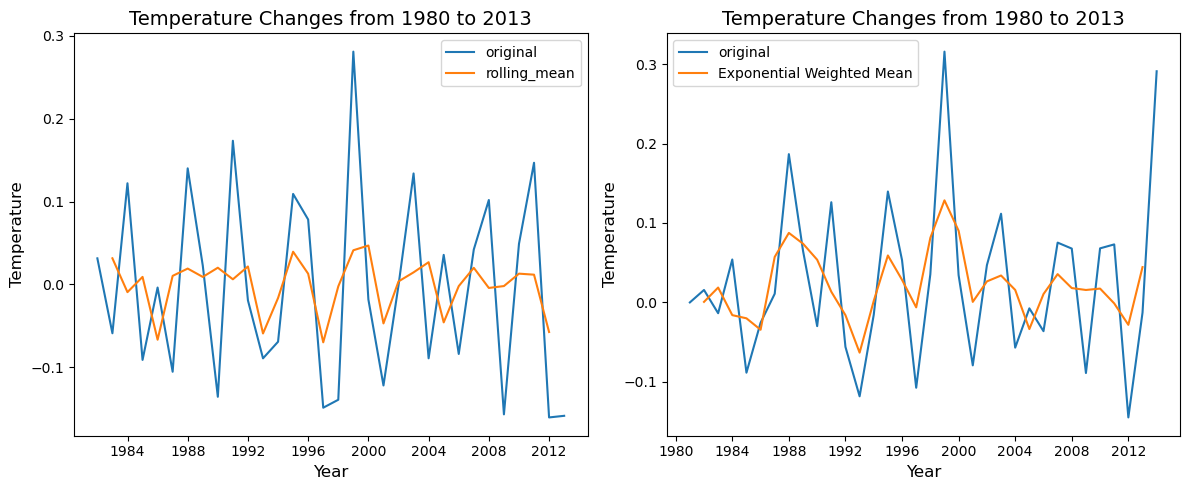

In [2584]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff=diff_ewm.rolling(window=3,center=True).mean()



fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(diff_rol_mean,label='original')
ax1.plot(df_rol_mean_diff,label='rolling_mean')
ax1.set_title("Temperature Changes from 1980 to 2013",fontsize=14)
ax1.set_ylabel("Temperature",fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='original')
ax2.plot(df_ewm_diff,label='Exponential Weighted Mean')
ax2.set_title("Temperature Changes from 1980 to 2013",fontsize=14)
ax2.set_ylabel("Temperature",fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [2585]:
print("Dicky Fuller test for the difference between original and rolling mean:")
print("Dickey Fuller Test Results:")
test_df=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=["Test Statistic",'p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value(%s)'%key]=value
print(df_output)  
print("")
print("Dickey Fuller Test Results:")
test_df=adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=["Test Statistic",'p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value(%s)'%key]=value
print(df_output)  

Dicky Fuller test for the difference between original and rolling mean:
Dickey Fuller Test Results:
Test Statistic                 -5.127399
p-value                         0.000012
Lags Used                       3.000000
Number of Observations Used    28.000000
Critical Value(1%)             -3.688926
Critical Value(5%)             -2.971989
Critical Value(10%)            -2.625296
dtype: float64

Dickey Fuller Test Results:
Test Statistic                -7.411710e+00
p-value                        7.105733e-11
Lags Used                      1.000000e+00
Number of Observations Used    3.200000e+01
Critical Value(1%)            -3.653520e+00
Critical Value(5%)            -2.957219e+00
Critical Value(10%)           -2.617588e+00
dtype: float64


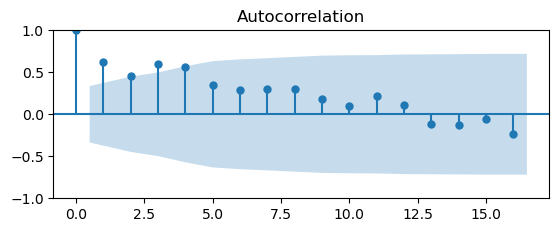

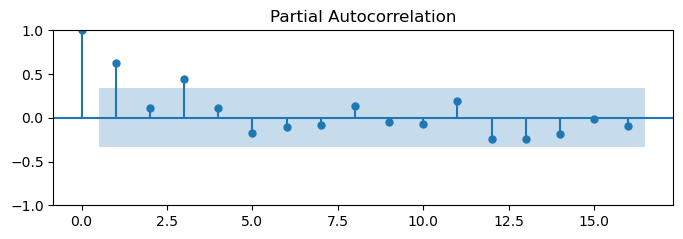

<Figure size 800x500 with 0 Axes>

In [2586]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplot(211)
plot_acf(resample_df,ax=plt.gca())
plt.figure(figsize=(8,5))
plt.subplot(212)
plot_pacf(resample_df,ax=plt.gca())
plt.figure(figsize=(8,5))
plt.show()


In [2587]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with p=1, d=1, q=2 (since no differencing was mentioned)
model = ARIMA(resample_df, order=(5, 1, 2))
fitted_model = model.fit()

In [2588]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   avgT   No. Observations:                   34
Model:                 ARIMA(5, 1, 2)   Log Likelihood                  11.477
Date:                Thu, 21 Nov 2024   AIC                             -6.954
Time:                        00:46:20   BIC                              5.018
Sample:                    12-31-1980   HQIC                            -2.926
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4321      0.743     -0.582      0.561      -1.888       1.024
ar.L2         -1.4015      0.556     -2.519      0.012      -2.492      -0.311
ar.L3         -0.3898      0.565     -0.690      0.491      -1.498       0.718
ar.L4         -0.3708      0.514     -0.722      0.470      -1.377       0.636
ar.L5         -0.0477      0.289     -0.165      0.869      -0.615       0.520
ma.L1          0.0748      0.709      0.105      0.916      -1.315       1.465
ma.L2          0.9725      2.088      0.466      0.641      -3.120       5.065
sigma2         0.0259      0.044      0.589      0.556      -0.060       0.112
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.66   Prob(JB):                         0.37
Heteroskedasticity (H):               1.00   Skew:                             0.55
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

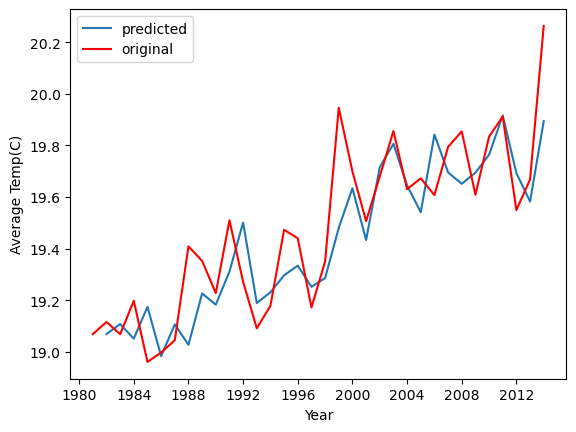

RSS: 0.9258036247455399


In [2589]:
plt.plot(fitted_model.fittedvalues.iloc[1:],label='predicted')
plt.plot(resample_df,color='red',label='original')
plt.xlabel("Year")
plt.ylabel("Average Temp(C)")
plt.legend()
plt.show()
x=fitted_model.fittedvalues
residuals = resample_df['avgT'] - x.iloc[1:]

# Step 4: Calculate the RSS (Residual Sum of Squares)
rss = (residuals ** 2).sum()
print("RSS:",rss)

In [2590]:
size = int(len(resample_df) - 20)
train, test = resample_df['avgT'][0:size], resample_df['avgT'][size:len(resample_df)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')
df_pred=pd.DataFrame(df['avgT'])
df_pred['arima_forecast']=np.nan
df_pred['arima_pred']=np.nan

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(5,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 

predicted = 19.358511, expected = 19.472903
predicted = 19.340084, expected = 19.439888
predicted = 19.383284, expected = 19.171847
predicted = 19.322983, expected = 19.350162
predicted = 19.348777, expected = 19.946031
predicted = 19.673473, expected = 19.698959
predicted = 19.270956, expected = 19.506243
predicted = 19.665620, expected = 19.679352
predicted = 19.888643, expected = 19.855685
predicted = 19.610203, expected = 19.630197
predicted = 19.481638, expected = 19.672204
predicted = 19.888173, expected = 19.607239
predicted = 19.691623, expected = 19.793993
predicted = 19.579205, expected = 19.854270
predicted = 19.758285, expected = 19.608778
predicted = 19.676049, expected = 19.833752
predicted = 19.945837, expected = 19.911734
predicted = 19.748928, expected = 19.549197
predicted = 19.557693, expected = 19.668239
predicted = 19.855634, expected = 20.263006


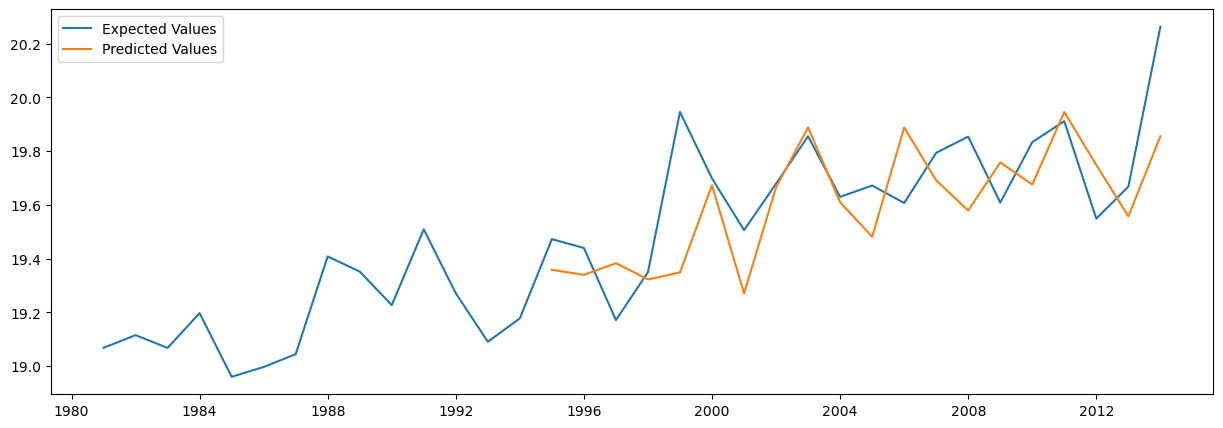

In [2591]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(resample_df['avgT'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [2592]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 0.2180
